# **SALES PREDICTION USING PYTHON**

In [1]:
import pandas as pd

# Load the dataset
sales_data = pd.read_csv('/content/advertising.csv')

# Display the first few rows of the dataset
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# Check for missing values
missing_values = sales_data.isnull().sum()

# If there are any missing values, handle them (e.g., fill with mean or median)
sales_data.fillna(sales_data.mean(), inplace=True)

# Display the updated dataset
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
# Splitting the data into features (X) and target (y)
X = sales_data.drop('Sales', axis=1)  # Assuming 'Sales' is the target column
y = sales_data['Sales']

# Splitting the data into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

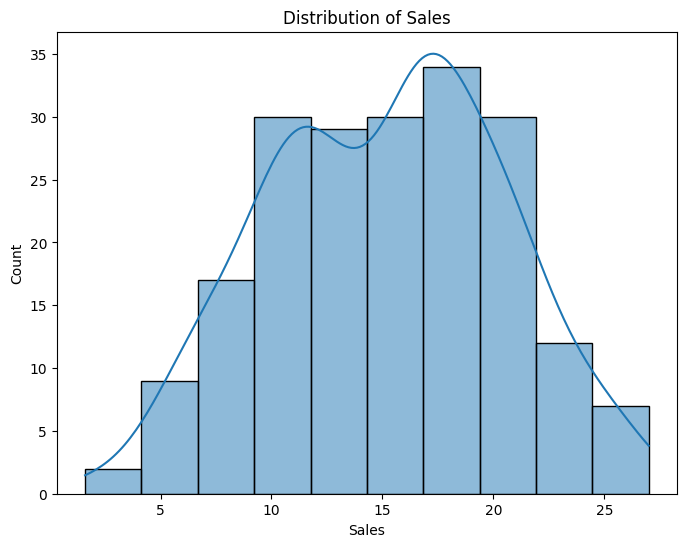

In [8]:
# Visualizing the distribution of sales
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of Sales')
plt.show()

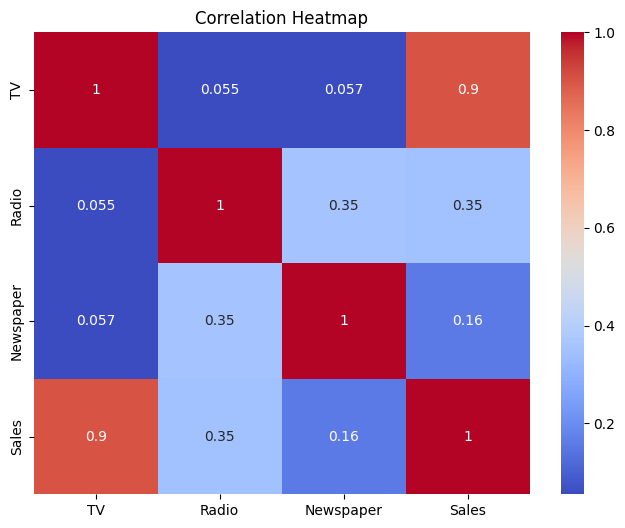

In [12]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(sales_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# Building the Model
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [14]:
#Evaluating the Model
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


In [15]:
#Making Predictions
#making a prediction with new data
new_data = pd.DataFrame({
    'TV': [150],
    'Radio': [30],
    'Newspaper': [20]
})

predicted_sales = model.predict(new_data)
print(f'Predicted Sales: {predicted_sales[0]}')

Predicted Sales: 16.00561083602645


In [17]:
new_data_batch = pd.DataFrame({
    'TV': [150, 200, 250],
    'Radio': [30, 40, 50],
    'Newspaper': [20, 25, 30]
})

# Predict sales for the new data batch
predicted_sales_batch = model.predict(new_data_batch)

# Display the predictions
for i, sales in enumerate(predicted_sales_batch):
    print(f'Predicted Sales for data point {i+1}: {sales}')

Predicted Sales for data point 1: 16.00561083602645
Predicted Sales for data point 2: 19.762211235927168
Predicted Sales for data point 3: 23.51881163582788
